In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader, AddTask2DatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
device = "cuda:0"
import matplotlib.pyplot as  plt
time_window = 50
batch_size = 128 # 128: anil kag
from torch.utils.data import DataLoader
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTask2DatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTask2DatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)
ckpt_dir = 'addsum_tests'

data = train_loader, test_loader

def test_fn(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
            #snn.pool_delays('i', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

C:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully


(0.0, 0.3)

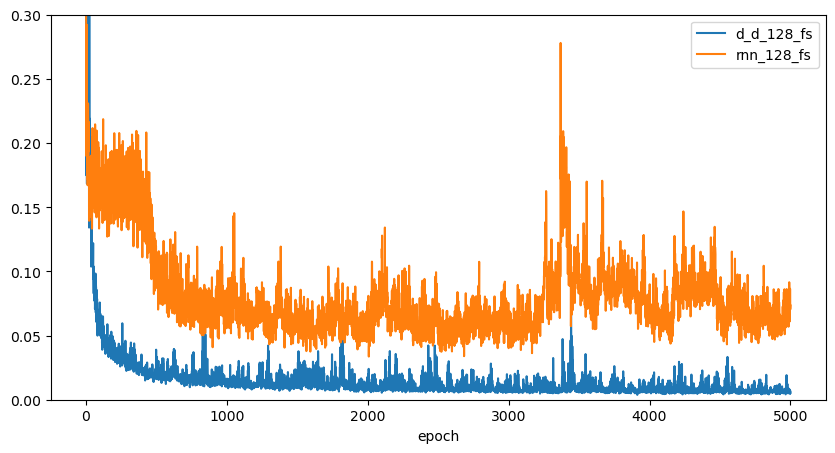

In [2]:
snn_d50_fs = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn_rnn50_fs = ModelLoader('add2_50_rnn_128_fs', ckpt_dir, batch_size, device)
plt.figure(figsize=(10,5))
ax = snn_d50_fs.plot_per_epoch(snn_d50_fs.train_loss, label='d_d_128_fs')
snn_d50_fs.plot_per_epoch(snn_rnn50_fs.train_loss, label='rnn_128_fs')
ax.set_ylim(0,0.3)

### Training delays with different depth

delays: [0]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=128, out_features=1, bias=False)
)
Total params: 384
Total mult-adds (M): 0.0192
training custom_2_1_12850_RSNN_d_d_1l128_1d1.t7 for 2000 epochs...
Epoch [1/2000]
Step [1/1], Loss: 0.50576
Time elasped: 0.1269693374633789
Epoch [2/2000]
Step [1/1], Loss: 0.41130
Time elasped: 0.12199997901916504
Epoch [3/2000]
Step [1/1], Loss: 0.31272
Time elasped: 0.12100028991699219
Epoch [4/2000]
Step [1/1], Loss: 0.18650
Time elasped: 0.1230003833770752
Epoch [5/2000]
Step [1/1], Loss: 0.22963
Time elasped: 0.12199926376342773
Test set accuracy: 8.59375% 
--------------------------
Epoch [6/2000]
Step [1/1], Loss: 0.22473
Time elasped: 0.12402915954589844
Epoch [7/2000]
Step [1/1], Loss: 0.20049
Time elasped: 0.12499809265136719
Epoch [8/2000]
Step [1/1], Loss: 0.22911
Time elasped: 0.12200021743774414
Epoch [9/2000]
Step [1/1], Loss: 0.28777
Time elasped: 0.126

KeyboardInterrupt: 

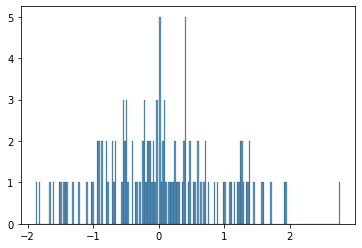

In [3]:
surr='fs'

n_h = 128

depth, stride = 1,1

name= f'add2_{time_window}_d_{depth}_{stride}_{n_h}_{surr}'

hidden = (n_h, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(depth, stride), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 2000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=1280, out_features=1, bias=False)
)
Total params: 1536
Total mult-adds (M): 0.0768
training custom_2_1_12850_RSNN_d_d_1l128_10d1.t7 for 2000 epochs...
Epoch [1/2000]
Step [1/1], Loss: 0.44576
Time elasped: 0.13899683952331543
Epoch [2/2000]
Step [1/1], Loss: 0.23965
Time elasped: 0.12600088119506836
Epoch [3/2000]
Step [1/1], Loss: 0.24983
Time elasped: 0.13232755661010742
Epoch [4/2000]
Step [1/1], Loss: 0.36926
Time elasped: 0.1260056495666504
Epoch [5/2000]
Step [1/1], Loss: 0.39851
Time elasped: 0.12735438346862793
Test set accuracy: 11.71875% 
--------------------------
Epoch [6/2000]
Step [1/1], Loss: 0.26199
Time elasped: 0.12599682807922363
Epoch [7/2000]
Step [1/1], Loss: 0.18233
Time elasped: 0.12497138977050781
Epoch [8/2000]
Step [1/1], Loss: 0.23899
Time elasped: 0.12474799156188965
Epoch [9/2000]
Step [1/1], L

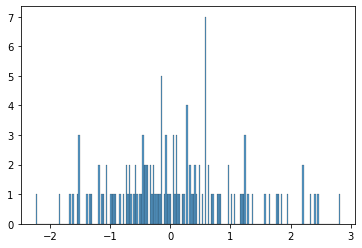

In [4]:
surr='fs'

n_h = 128

depth, stride = 10,1

name= f'add2_{time_window}_d_{depth}_{stride}_{n_h}_{surr}'

hidden = (n_h, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(depth, stride), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 2000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=3840, out_features=1, bias=False)
)
Total params: 4096
Total mult-adds (M): 0.2048
training custom_2_1_12850_RSNN_d_d_1l128_30d1.t7 for 2000 epochs...
Epoch [1/2000]
Step [1/1], Loss: 2.52557
Time elasped: 0.1369922161102295
Epoch [2/2000]
Step [1/1], Loss: 0.43719
Time elasped: 0.13899993896484375
Epoch [3/2000]
Step [1/1], Loss: 0.52953
Time elasped: 0.12997007369995117
Epoch [4/2000]
Step [1/1], Loss: 1.11443
Time elasped: 0.12999987602233887
Epoch [5/2000]
Step [1/1], Loss: 1.01094
Time elasped: 0.1360011100769043
Test set accuracy: 4.6875% 
--------------------------
Epoch [6/2000]
Step [1/1], Loss: 0.63136
Time elasped: 0.131972074508667
Epoch [7/2000]
Step [1/1], Loss: 0.22914
Time elasped: 0.12999916076660156
Epoch [8/2000]
Step [1/1], L

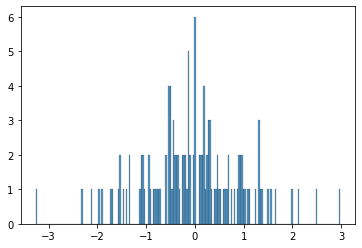

In [5]:
surr='fs'

n_h = 128

depth, stride = 30,1

name= f'add2_{time_window}_d_{depth}_{stride}_{n_h}_{surr}'

hidden = (n_h, 1, 'f')
snn = RSNN_d_d('custom_2_1_{}'.format(batch_size), hidden=hidden, delay =(depth, stride), thresh=0.3, tau_m='adp', win=time_window, surr=surr,  loss_fn ='prediction2', batch_size=batch_size, device=device)
snn.plot(snn.tau_m_1)
snn.to(device)

train(snn, data, 1e-3, 2000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn, scheduler=False)
snn.save_model(name, ckpt_dir)

delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully


(0.0, 0.3)

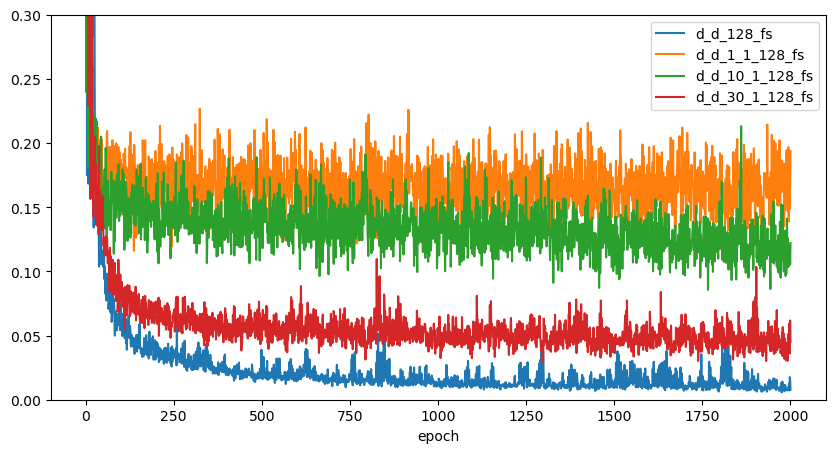

In [4]:
snn_d50_1_1_fs = ModelLoader('add2_50_d_1_1_128_fs', ckpt_dir, batch_size, device)
snn_d50_10_1_fs = ModelLoader('add2_50_d_10_1_128_fs', ckpt_dir, batch_size, device)
snn_d50_30_1_fs = ModelLoader('add2_50_d_30_1_128_fs', ckpt_dir, batch_size, device)
plt.figure(figsize=(10,5))
ax = snn_d50_fs.plot_per_epoch(snn_d50_fs.train_loss[:2000], label='d_d_128_fs')
snn_d50_1_1_fs.plot_per_epoch(snn_d50_1_1_fs.train_loss, label='d_d_1_1_128_fs')
snn_d50_1_1_fs.plot_per_epoch(snn_d50_10_1_fs.train_loss, label='d_d_10_1_128_fs')
snn_d50_1_1_fs.plot_per_epoch(snn_d50_30_1_fs.train_loss, label='d_d_30_1_128_fs')
ax.set_ylim(0,0.3)

In [10]:
import numpy as np

d_test = AddTask2DatasetLoader(50, 128, randomness=True) # 2560 from schmiduber paper
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d50_1_1_fs.loss_fn = 'prediction2'
snn_d50_10_1_fs.loss_fn = 'prediction2'
snn_d50_30_1_fs.loss_fn = 'prediction2'
for images, labels in test_loader:
    pred_1, ref_1 = snn_d50_1_1_fs.propagate(images.to(device), labels.to(device))
    pred_2, ref_2 = snn_d50_10_1_fs.propagate(images.to(device), labels.to(device))
    pred_3, ref_3 = snn_d50_30_1_fs.propagate(images.to(device), labels.to(device))

Test set accuracy (1): 20.3125%
Test set accuracy (2): 20.3125%


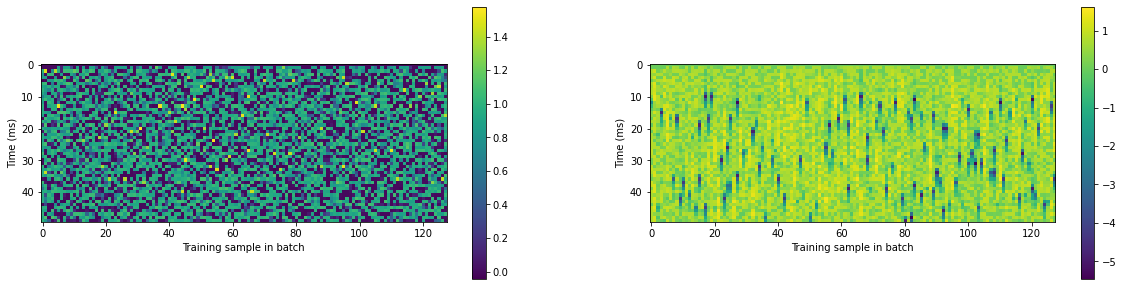

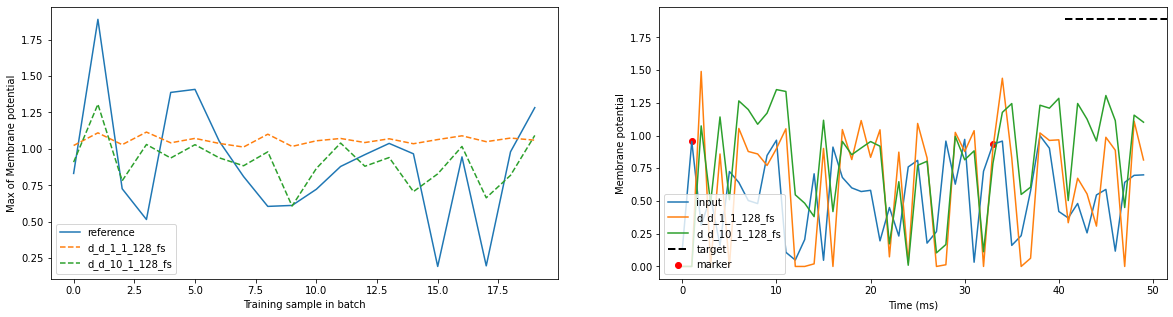

In [17]:
n = np.random.randint(batch_size)

correct_1 = torch.sum(abs(pred_1-ref_1) < 0.1)
correct_2 = torch.sum(abs(pred_2-ref_2) < 0.1)
print(f'Test set accuracy (1): {100*correct_1.item()/len(images)}%')
print(f'Test set accuracy (2): {100*correct_2.item()/len(images)}%')

cmap = 'RdBu'

fig, (ax1, ax2) = plt.subplots(figsize=(20, 5), ncols=2)
im1 = ax1.imshow(snn_d50_1_1_fs.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im1, ax = ax1)
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Training sample in batch')
im2 = ax2.imshow(snn_d50_10_1_fs.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im2, ax = ax2)
ax2.set_ylabel('Time (ms)')
ax2.set_xlabel('Training sample in batch')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(ref_1[:20].detach().cpu().numpy(), label='reference')
plt.plot(pred_1[:20].detach().cpu().numpy(), label = 'd_d_1_1_128_fs', ls='--')
plt.plot(pred_2[:20].detach().cpu().numpy(), label= 'd_d_10_1_128_fs', ls='--')
plt.xlabel('Training sample in batch')
plt.ylabel('Max of Membrane potential')
plt.legend(loc='lower left')

inp = snn_d50_1_1_fs.spike_state['input'].detach().cpu().numpy()[:, n ,0]
spk = snn_d50_1_1_fs.spike_state['input'].detach().cpu().numpy()[:, n ,1]

plt.subplot(122)
plt.plot(inp, label='input')
plt.plot(snn_d50_1_1_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label = 'd_d_1_1_128_fs')
plt.plot(snn_d50_10_1_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'd_d_10_1_128_fs')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='marker')
plt.axhline(ref_1[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.legend(loc='lower left')
plt.show()

Test set accuracy (1): 20.3125%
Test set accuracy (2): 20.3125%


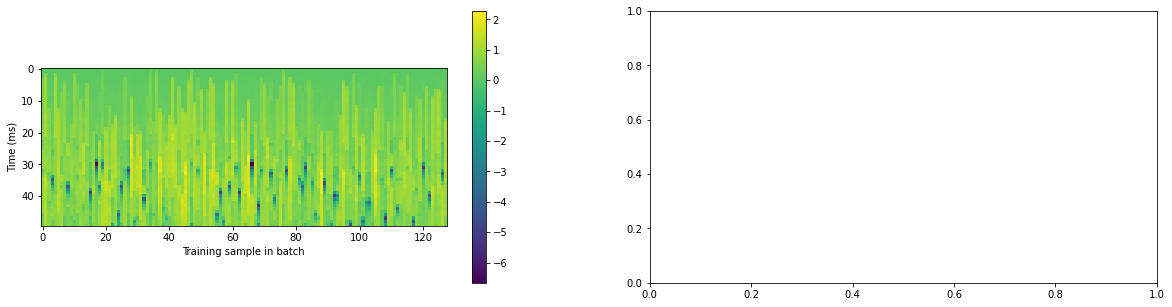

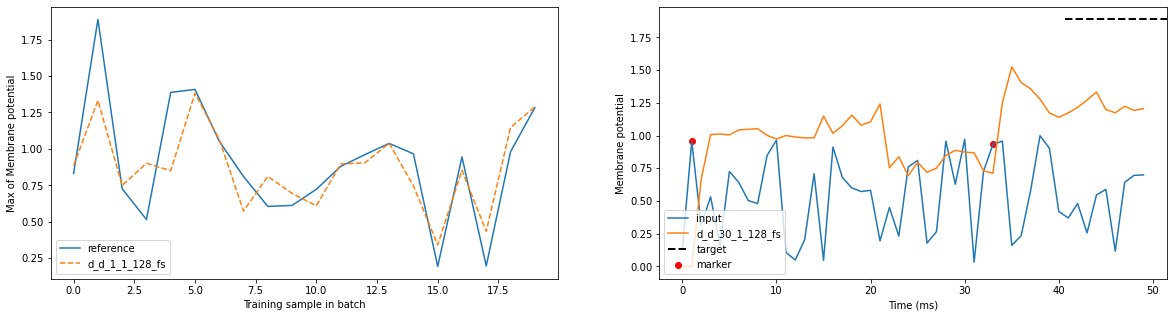

In [18]:
correct_3 = torch.sum(abs(pred_3-ref_3) < 0.1)
print(f'Test set accuracy (1): {100*correct_1.item()/len(images)}%')
print(f'Test set accuracy (2): {100*correct_2.item()/len(images)}%')

cmap = 'RdBu'

fig, (ax1, ax2) = plt.subplots(figsize=(20, 5), ncols=2)
im1 = ax1.imshow(snn_d50_30_1_fs.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im1, ax = ax1)
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Training sample in batch')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(ref_1[:20].detach().cpu().numpy(), label='reference')
plt.plot(pred_3[:20].detach().cpu().numpy(), label = 'd_d_1_1_128_fs', ls='--')
plt.xlabel('Training sample in batch')
plt.ylabel('Max of Membrane potential')
plt.legend(loc='lower left')

inp = snn_d50_1_1_fs.spike_state['input'].detach().cpu().numpy()[:, n ,0]
spk = snn_d50_1_1_fs.spike_state['input'].detach().cpu().numpy()[:, n ,1]

plt.subplot(122)
plt.plot(inp, label='input')
plt.plot(snn_d50_30_1_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'd_d_30_1_128_fs')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='marker')
plt.axhline(ref_1[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.legend(loc='lower left')
plt.show()

## Pooling delays

In [58]:
# loading pretrained
snn = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully


In [60]:
import numpy as np
n = np.random.randint(batch_size)
d_test = AddTask2DatasetLoader(50, 128, randomness=False) # 2560 from schmiduber paper
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

accs = []

for d in range(50):

    snn_pooled = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
    snn_pooled.pool_delays(lyr='o', k=d+1)

    snn.loss_fn = 'prediction2'
    snn_pooled.loss_fn = 'prediction2'
    #snn_d50_30_1_fs.loss_fn = 'prediction2'
    for images, labels in test_loader:
        pred_1, ref_1 = snn.propagate(images.to(device), labels.to(device))
        pred_2, ref_2 = snn_pooled.propagate(images.to(device), labels.to(device))
        #pred_3, ref_3 = snn_d50_30_1_fs.propagate(images.to(device), labels.to(device))

    correct_1 = torch.sum(abs(pred_1-ref_1) < 0.1).item()
    correct_2 = torch.sum(abs(pred_2-ref_2) < 0.1).item()
    print(f'Test set accuracy (1): {100*correct_1/len(images)}%')
    print(f'Test set accuracy (2): {100*correct_2/len(images)}%')
    
    accs.append(correct_2)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
Test set accuracy (1): 86.71875%
Test set accuracy (2): 0.78125%
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
Test set accuracy (1): 86.71875%
Test set accuracy (2): 3.90625%
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
Test set accuracy (1): 86.71875%
Test set accuracy (2): 3.90625%
d

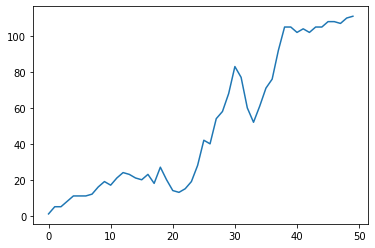

In [61]:
plt.plot(accs)

In [37]:
def test_fn_pool(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
        snn.pool_delays('o', k= 10, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

snn = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn.loss_fn = 'prediction2'
snn.train_loss = []
snn.criterion = torch.nn.MSELoss()
train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn_pool, scheduler=False)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 0.3328
training custom_2_1_12850_RSNN_d_d_1l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.00496
Time elasped: 0.1380009651184082
Epoch [2/5000]
Step [1/1], Loss: 1.30749
Time elasped: 0.13200044631958008
Epoch [3/5000]
Step [1/1], Loss: 0.06633
Time elasped: 0.13106250762939453
Epoch [4/5000]
Step [1/1], Loss: 0.99835
Time elasped: 0.1321549415588379
Epoch [5/5000]
Step [1/1], Loss: 0.58442
Time elasped: 0.13100600242614746
Test set accuracy: 3.125% 
--------------------------
Epoch [6/5000]
Step [1/1], L

In [38]:
snn.save_model('add2_50_d_128_fs_pool_10', ckpt_dir)

In [39]:
def test_fn_pool(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
        snn.pool_delays('o', k= 5, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

snn = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn.loss_fn = 'prediction2'
snn.train_loss = []
snn.criterion = torch.nn.MSELoss()
train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn_pool, scheduler=False)
snn.save_model('add2_50_d_128_fs_pool_5', ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 0.3328
training custom_2_1_12850_RSNN_d_d_1l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.00592
Time elasped: 0.13399982452392578
Epoch [2/5000]
Step [1/1], Loss: 2.63693
Time elasped: 0.13199996948242188
Epoch [3/5000]
Step [1/1], Loss: 0.07647
Time elasped: 0.13303041458129883
Epoch [4/5000]
Step [1/1], Loss: 1.13333
Time elasped: 0.13697385787963867
Epoch [5/5000]
Step [1/1], Loss: 1.58431
Time elasped: 0.13317346572875977
Test set accuracy: 2.34375% 
--------------------------
Epoch [6/5000]
Step [1/1

In [40]:
def test_fn_pool(snn, ckpt_dir, test_loader, max_acc, epoch):
    if (epoch + 1) % 5 == 0:
        #if epoch>=50:
            #print('pooling delays')
        snn.pool_delays('o', k= 1, freeze=False)
        for images, labels in test_loader:
            pred, ref = snn.propagate(images.to(device), labels.to(device))
            
        correct = torch.sum(abs(pred-ref) < 0.04)
        print(f'Test set accuracy: {100*correct.item()/len(images)}% ')
        print('--------------------------')
    return max_acc

snn = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn.loss_fn = 'prediction2'
snn.train_loss = []
snn.criterion = torch.nn.MSELoss()
train(snn, data, 1e-3, 5000, ckpt_dir=ckpt_dir, l1_reg=0.0, test_fn=test_fn_pool, scheduler=False)
snn.save_model('add2_50_d_128_fs_pool_1', ckpt_dir)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
RSNN_d_d(
  (criterion): MSELoss()
  (f0_i): Linear(in_features=2, out_features=128, bias=False)
  (f1_o): Linear(in_features=6400, out_features=1, bias=False)
)
Total params: 6656
Total mult-adds (M): 0.3328
training custom_2_1_12850_RSNN_d_d_1l128_50d1.t7 for 5000 epochs...
Epoch [1/5000]
Step [1/1], Loss: 0.00551
Time elasped: 0.1309983730316162
Epoch [2/5000]
Step [1/1], Loss: 2.42998
Time elasped: 0.13400053977966309
Epoch [3/5000]
Step [1/1], Loss: 0.02900
Time elasped: 0.13200092315673828
Epoch [4/5000]
Step [1/1], Loss: 1.38598
Time elasped: 0.13302993774414062
Epoch [5/5000]
Step [1/1], Loss: 1.31109
Time elasped: 0.13296866416931152
Test set accuracy: 0.0% 
--------------------------
Epoch [6/5000]
Step [1/1], Lo

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 4

(0.0, 0.3)

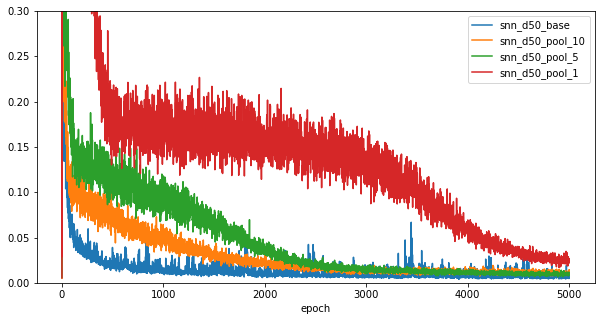

In [2]:
snn_d50 = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn_d50_pool_10 = ModelLoader('add2_50_d_128_fs_pool_10', ckpt_dir, batch_size, device)
snn_d50_pool_5 = ModelLoader('add2_50_d_128_fs_pool_5', ckpt_dir, batch_size, device)
snn_d50_pool_1 = ModelLoader('add2_50_d_128_fs_pool_1', ckpt_dir, batch_size, device)
plt.figure(figsize=(10,5))
ax = snn_d50_pool_10.plot_per_epoch(snn_d50.train_loss, label='snn_d50_base')
snn_d50_pool_10.plot_per_epoch(snn_d50_pool_10.train_loss, label='snn_d50_pool_10')
snn_d50_pool_10.plot_per_epoch(snn_d50_pool_5.train_loss, label='snn_d50_pool_5')
snn_d50_pool_10.plot_per_epoch(snn_d50_pool_1.train_loss, label='snn_d50_pool_1')
ax.set_ylim(0,0.3)

In [44]:
d_test = AddTask2DatasetLoader(50, 128, randomness=True) # 2560 from schmiduber paper
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d50.loss_fn = 'prediction2'
snn_d50_pool_10.loss_fn = 'prediction2'
snn_d50_pool_5.loss_fn = 'prediction2'
snn_d50_pool_1.loss_fn = 'prediction2'

for images, labels in test_loader:
    pred, ref = snn_d50.propagate(images.to(device), labels.to(device))
    pred_1, ref_1 = snn_d50_pool_10.propagate(images.to(device), labels.to(device))
    pred_2, ref_2 = snn_d50_pool_5.propagate(images.to(device), labels.to(device))
    pred_3, ref_3 = snn_d50_pool_1.propagate(images.to(device), labels.to(device))

Test set accuracy (base): 78.90625%
Test set accuracy (pool 10): 58.59375%


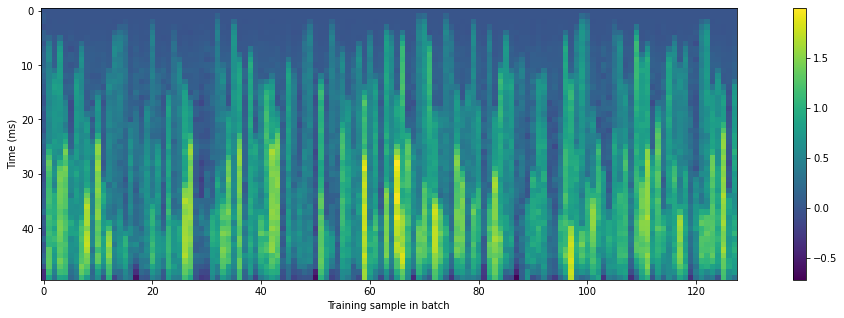

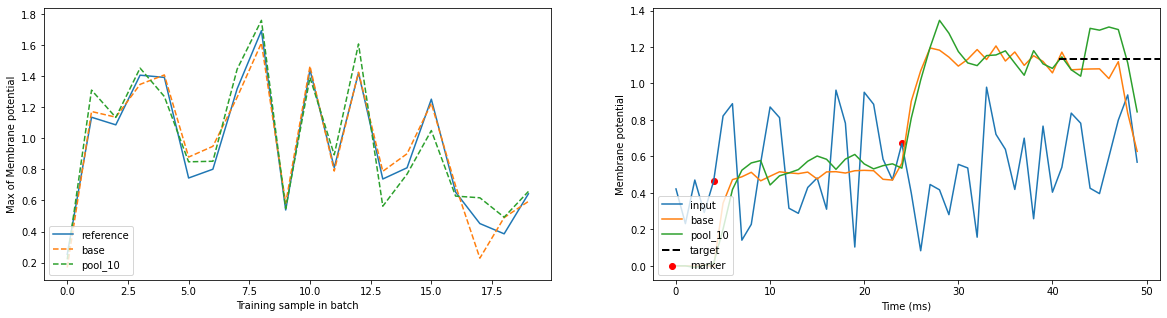

In [47]:
correct = torch.sum(abs(pred-ref) < 0.1)
correct_1 = torch.sum(abs(pred_1-ref_1) < 0.1)
print(f'Test set accuracy (base): {100*correct.item()/len(images)}%')
print(f'Test set accuracy (pool 10): {100*correct_1.item()/len(images)}%')

cmap = 'RdBu'

fig, ax1 = plt.subplots(figsize=(20, 5), ncols=1)
im1 = ax1.imshow(snn_d50_pool_10.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im1, ax = ax1)
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Training sample in batch')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(ref[:20].detach().cpu().numpy(), label='reference')
plt.plot(pred[:20].detach().cpu().numpy(), label = 'base', ls='--')
plt.plot(pred_1[:20].detach().cpu().numpy(), label = 'pool_10', ls='--')
plt.xlabel('Training sample in batch')
plt.ylabel('Max of Membrane potential')
plt.legend(loc='lower left')

inp = snn_d50.spike_state['input'].detach().cpu().numpy()[:, n ,0]
spk = snn_d50.spike_state['input'].detach().cpu().numpy()[:, n ,1]

plt.subplot(122)
plt.plot(inp, label='input')
plt.plot(snn_d50.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'base')
plt.plot(snn_d50_pool_10.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'pool_10')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='marker')
plt.axhline(ref[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.legend(loc='lower left')
plt.show()

Test set accuracy (base): 78.90625%
Test set accuracy (pool 5): 62.5%


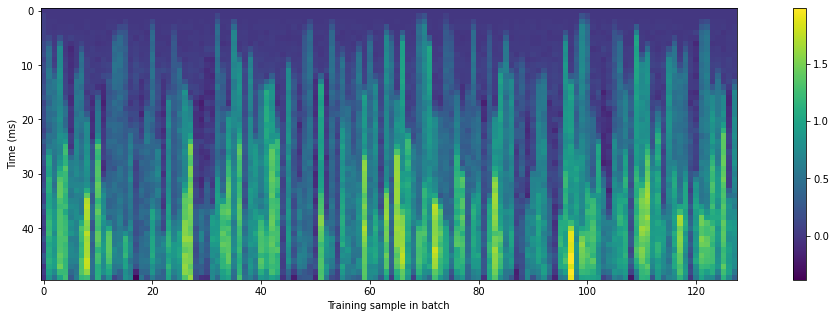

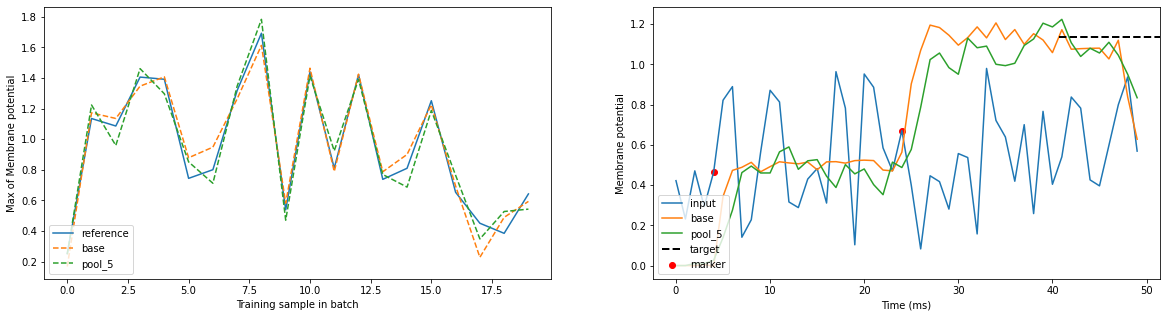

In [49]:
correct = torch.sum(abs(pred-ref) < 0.1)
correct_2 = torch.sum(abs(pred_2-ref_2) < 0.1)
print(f'Test set accuracy (base): {100*correct.item()/len(images)}%')
print(f'Test set accuracy (pool 5): {100*correct_2.item()/len(images)}%')

cmap = 'RdBu'

fig, ax1 = plt.subplots(figsize=(20, 5), ncols=1)
im1 = ax1.imshow(snn_d50_pool_5.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im1, ax = ax1)
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Training sample in batch')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(ref[:20].detach().cpu().numpy(), label='reference')
plt.plot(pred[:20].detach().cpu().numpy(), label = 'base', ls='--')
plt.plot(pred_2[:20].detach().cpu().numpy(), label = 'pool_5', ls='--')
plt.xlabel('Training sample in batch')
plt.ylabel('Max of Membrane potential')
plt.legend(loc='lower left')

inp = snn_d50.spike_state['input'].detach().cpu().numpy()[:, n ,0]
spk = snn_d50.spike_state['input'].detach().cpu().numpy()[:, n ,1]

plt.subplot(122)
plt.plot(inp, label='input')
plt.plot(snn_d50.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'base')
plt.plot(snn_d50_pool_5.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'pool_5')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='marker')
plt.axhline(ref[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.legend(loc='lower left')
plt.show()

Test set accuracy (base): 78.90625%
Test set accuracy (pool 1): 51.5625%


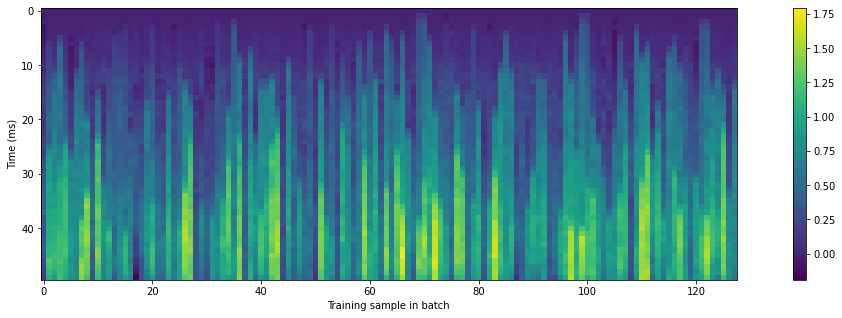

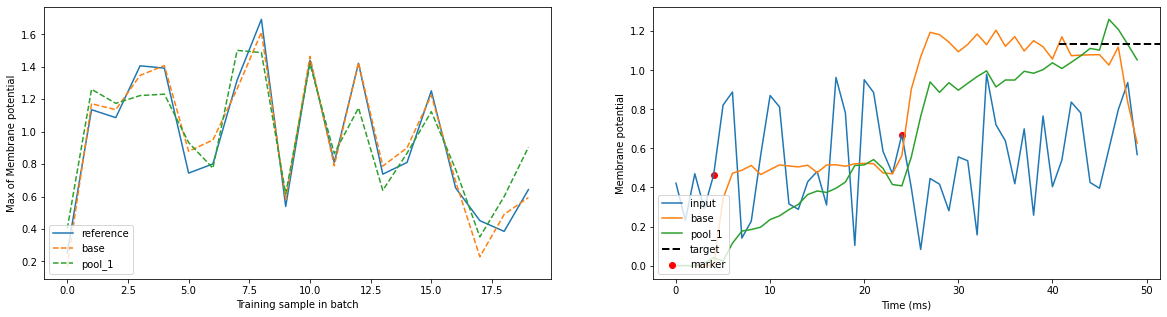

In [50]:
correct = torch.sum(abs(pred-ref) < 0.1)
correct_3 = torch.sum(abs(pred_3-ref_3) < 0.1)
print(f'Test set accuracy (base): {100*correct.item()/len(images)}%')
print(f'Test set accuracy (pool 1): {100*correct_3.item()/len(images)}%')

cmap = 'RdBu'

fig, ax1 = plt.subplots(figsize=(20, 5), ncols=1)
im1 = ax1.imshow(snn_d50_pool_1.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im1, ax = ax1)
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Training sample in batch')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(ref[:20].detach().cpu().numpy(), label='reference')
plt.plot(pred[:20].detach().cpu().numpy(), label = 'base', ls='--')
plt.plot(pred_3[:20].detach().cpu().numpy(), label = 'pool_1', ls='--')
plt.xlabel('Training sample in batch')
plt.ylabel('Max of Membrane potential')
plt.legend(loc='lower left')

inp = snn_d50.spike_state['input'].detach().cpu().numpy()[:, n ,0]
spk = snn_d50.spike_state['input'].detach().cpu().numpy()[:, n ,1]

plt.subplot(122)
plt.plot(inp, label='input')
plt.plot(snn_d50.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'base')
plt.plot(snn_d50_pool_1.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'pool_1')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='marker')
plt.axhline(ref[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.legend(loc='lower left')
plt.show()

Text(0.5, 1.0, '1 delay per synapse')

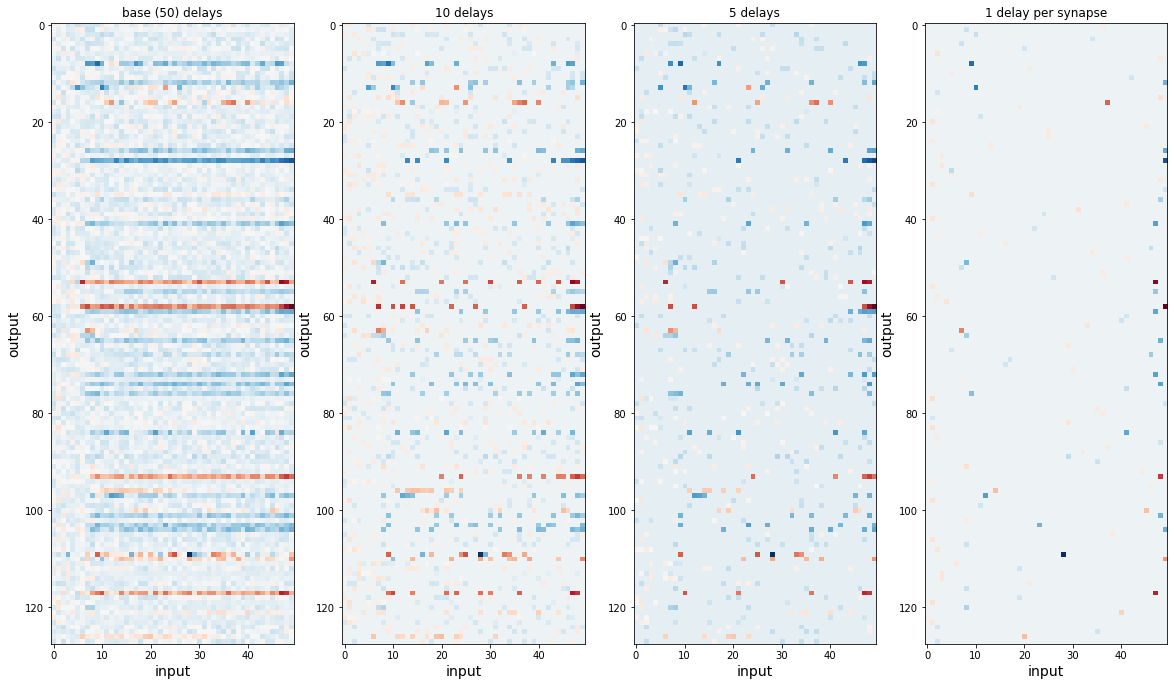

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(20, 15), ncols=4)
snn_d50.plot(snn_d50.f1_o.weight.reshape(128,50), mode='matrix', ax=ax1)
snn_d50.plot(snn_d50_pool_10.f1_o.weight.reshape(128,50), mode='matrix', ax=ax2)
snn_d50.plot(snn_d50_pool_5.f1_o.weight.reshape(128,50), mode='matrix', ax=ax3)
snn_d50.plot(snn_d50_pool_1.f1_o.weight.reshape(128,50), mode='matrix', ax=ax4)
ax1.set_title('base (50) delays')
ax2.set_title('10 delays')
ax3.set_title('5 delays')
ax4.set_title('1 delay per synapse')